In [5]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv



dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10241.75, 12491.4, 12852.75, 15302.6, 16810.0, 18531.4, 20102.4, 21598.8, 26936.8, 36549.4])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10805.2, 12467.2, 13817.2, 15067.4, 16781.0, 18342.4, 20847.833333333332, 21748.8, 26632.8, 36096.0])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10185.75, 11014.0, 11168.6, 11073.0, 11149.4, 11325.8, 11365.2, 11485.0, 12148.4, 13978.6, 17385.6])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([11036.6, 11570.5, 11560.333333333334, 11246.8, 11188.0, 11454.6, 11499.0, 11643.6, 12332.4, 14359.0, 17755.6])


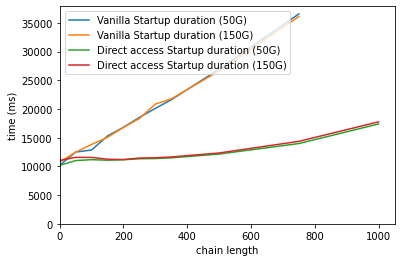

In [3]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pprint
pp = pprint.PrettyPrinter(indent=4)

RESULTS_PATH="/home/nivek/Documents/results_expes"
VANILLA_FILE_PATH=RESULTS_PATH+"/startup/vanilla/time_van_ms"
DIRECT_FILE_PATH=RESULTS_PATH+"/startup/direct_hack/time_dh_ms"

def data_per_disk_from_file(file_path):
    data_per_disk = {}

    with open(file_path, 'r') as datafile:
        lines = datafile.readlines()
        i=0
        snap_nb = -1
        disk_size = -1
        while True:
            unpack_obj = parse.parse("****Snapshots : {} - Disk : {}****\n", lines[i])
            ms = -1
            if unpack_obj != None:
                [snap_nb, disk_size] = unpack_obj
            else:
                unpack_obj = parse.parse("{:d}\n", lines[i])
                if unpack_obj == None: break
                [ms] = unpack_obj

            if disk_size not in data_per_disk.keys():
                data_per_disk[disk_size] = {}

            if snap_nb not in data_per_disk[disk_size].keys():
                data_per_disk[disk_size][snap_nb] = []

            data_per_disk[disk_size][snap_nb] += [ms]


            i += 1
            if i == len(lines):
                break
    return data_per_disk

data_per_disk_vanilla = data_per_disk_from_file(VANILLA_FILE_PATH)
data_per_disk_dh = dpddh= data_per_disk_from_file(DIRECT_FILE_PATH)


for k in data_per_disk_vanilla.keys():
    for kk in data_per_disk_vanilla[k].keys():
        data_per_disk_vanilla[k][kk] = sum(data_per_disk_vanilla[k][kk])/len(data_per_disk_vanilla[k][kk])
    dic = data_per_disk_vanilla[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Vanilla Startup duration ("+k+")")
    
for k in dpddh.keys():
    for kk in dpddh[k].keys():
        dpddh[k][kk] = sum(dpddh[k][kk])/len(dpddh[k][kk])
    dic = dpddh[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Direct access Startup duration ("+k+")")

plt.xlabel("chain length")
plt.ylabel("time (ms)")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.legend()    
plt.show()

In [ ]:
import pandas as pd

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv", "vanilla500.csv", "vanilla1000.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]

df = pd.DataFrame()
temp = pd.read_csv(MICRO_METRICS_DIR+"vanilla1000.csv", iterator=True, chunksize=90000, delimiter=";",
                  names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
df = pd.concat(temp, ignore_index=True)

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv", "vanilla500.csv", "vanilla1000.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]

def get_data(files):
    n = []
    u = []
    cm = []
    cr = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

#         with open(CSV_FILE, 'r') as datafile :
#             csvreader = csv.reader(datafile, delimiter=';', quotechar='|')
#             for row in csvreader:
#                 datas += [row]
#         df = pd.DataFrame(datas, columns=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
    #     #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
#         datan = df[df.event == "NORMAL"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datan)
#         datau = []
#         if len(df[df.event == "UNALLOCATED"]) > 0:
#             datau = df[df.event == "UNALLOCATED"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datau)
        nn = len(df[df.event == "NORMAL"])
        uu = len(df[df.event == "UNALLOCATED"])
        cmm = len(df[df.event == "CACHE_MISSED"]) 
        crr = len(df[df.event == "CACHE_REQ"])
        n += [100*nn/(nn+uu)]
        u += [100*uu/(nn+uu)]
        cm += [100*cmm/crr]
        cr += [100*(crr-cmm)/crr]

        del datas
        del temp
        del df
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(len(cols))
    ax.bar(X+0.0, n, width=0.47)
    ax.bar(X+0.0, u, width=0.47, bottom=n)
    ax.bar(X+0.47, cm, width=0.47)
    ax.bar(X+0.47, cr, width=0.47, bottom=cm)
    ax.legend(labels=["normal", "unallocated", "cache missed", "cache hit"])
    print(n, u, cm, cr, "=== df")
    ax.set_xticks(X)
    ax.set_xticklabels(cols)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(100))
    
    rects = ax.patches
    
    # Make some labels.
    tt = n + u + cm + cr
    for i, rect in enumerate(rects):
        label = tt[i]
        label = "{:.3f} %".format(label) if label > 0 else ""
        height = rect.get_height()
        
        ax.text(
            rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", rotation=30
        )
    plt.show()

get_data(files_results_vanilla)
print("------------------------------------")
get_data(files_results_direct)

In [14]:
def filt(g):
    return g.nunique()["snapshot_id"] > 1

def get_data(files):
    val_mean = []
    val_sum = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
        
        df["offset"] = pd.to_numeric(df["offset"])
        df["l2_offset"] = pd.to_numeric(df["l2_offset"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
        df["l1_index"] = pd.to_numeric(df["l1_index"])
        #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
        data = df[ (df.event == "CACHE_MISSED") | (df.event == "CACHE_REQ") ] \
            .groupby(["l2_offset", "l1_index"]).filter(filt).groupby(["l2_offset", "l1_index"])["snapshot_id"].nunique().var() 
        data2 = df[ (df.event == "CACHE_MISSED") | (df.event == "CACHE_REQ") ] \
            .groupby(["l2_offset", "l1_index"]).filter(filt).groupby(["l2_offset", "l1_index"])["snapshot_id"].nunique().sum()
        
        val_mean += [data]
        val_sum += [data2]

        del datas
        del temp
        del df
        
    print(val_mean)
    print(val_sum)


get_data(files_results_vanilla)
print("------------------------------------")
get_data(files_results_direct)

[nan, nan, 58.15673469387754, 1006.1965359063586]
[0, 0, 254, 4529]
------------------------------------
[nan, nan, 67.42804878048781, 3414.0560967048414, 8892.766032085561]
[0, 0, 240, 2553, 5883]


In [69]:
"""
    Formal example and test cells
    do not use for real diagrams
    ✊😌
"""


import pandas as pd

array = [
    ["cm", 4, 5, 14],
    ["cr", 4, 5, 14],
    ["cm", 3, 5, 14],
    ["cm", 2, 5, 14],
    ["cm", 1, 5, 14],
    ["cr", 1, 5, 14],
    ["cm", 4, 6, 15],
    ["cm", 3, 6, 15],
    ["cm", 2, 6, 15],
    ["cr", 2, 6, 15],
    ["cm", 4, 7, 16],
    ["cr", 4, 7, 16],
    
    ["cm", 4, 8, 14],
    ["cr", 4, 8, 14],
    ["cm", 3, 8, 14],
    ["cr", 3, 8, 14],
    ["cm", 2, 8, 14],
]


df = pd.DataFrame(array, columns=["event", "sid", "l1_ind", "l2_off"])
def fil(g):
    return g.nunique()["sid"] > 1
print( df[ (df.event == "cm") | (df.event == "cr") ] \
            .groupby(["l2_off", "l1_ind"]).filter(fil).groupby(["l2_off", "l1_ind"])["sid"].nunique().mean() )

3.3333333333333335


In [27]:
def lol(n):
    res =[9]*n
    return res
%memit lol(300000)

peak memory: 219.92 MiB, increment: 0.00 MiB
